

### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.


If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.


In [14]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

import scipy.optimize as so


### Part 1

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

I wrote a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so I can omit the $ \ln(y!)$ in my function.



In [15]:
def poissonNegLogLikelihood(lam,y):
    """
    Inputs:
    lam - float or array.  Parameter for the poisson distribution.
    y - float or array.  Observed data.
    This implementation is vectorized.
    Vectorization will come in handy down the road
    
    Outputs:
    log_lik - float.  The negative log-likelihood for the data (y) with parameter (lam).

    """
    neg_log_lik =  -np.sum(y*np.log(lam) - lam)

    return neg_log_lik



---

### Part 2

I wrote a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. 

The expoential is applied so as to constrain lambda to be positive


Using a linear function in place of lamba might allow for negative lambda



In [7]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik


### Part 3
I wrote a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 



In [8]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat


### Part 3

I wrote a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.



In [9]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    nrows,ncols = X.shape
    beta_start =np.zeros((ncols,1)) 
    # Minimize the appropriate likelihood function
    mle = so.minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y), method="Powell", tol=1e-8)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas



### Part 4

The data from `poisson_regression_data.csv` is loaded. 

Scatterplot of the data is plotted and then a poisson regression is fitted to this data using the functions I wrote above.  

Finally, the model predictions over $x \in [-2,2]$ is plotted on the same graph as the scatterplot of the data.  

In [10]:
df = pd.read_csv("poisson_regression_data.csv")
df.head()

,x,y
0,0.232466,3
1,-0.370613,1
2,0.929731,4
3,0.356606,1
4,0.387176,2


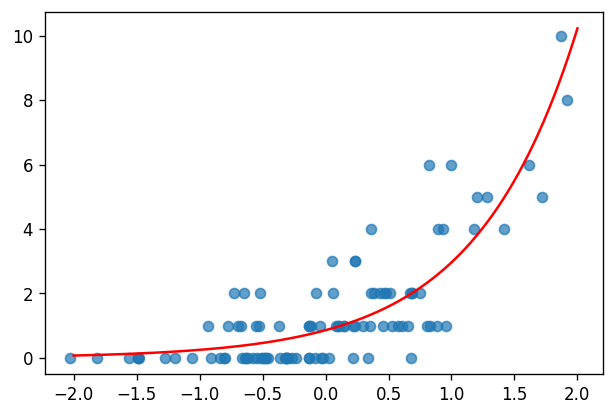

In [11]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")

# Scatterplot the data. 
fig, ax = plt.subplots(dpi = 120)
ax.scatter(df.x.values, df.y.values, alpha = 0.7)

# Fit the model.  Use your functions.  
x = df.x.values 
X = np.c_[np.ones(x.size),x]
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(newx.size),newx]

# Make predictions on the new data
y_predicted=modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
ax.plot(newx,y_predicted, color='r')



### Part 5

Now I decided to apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.

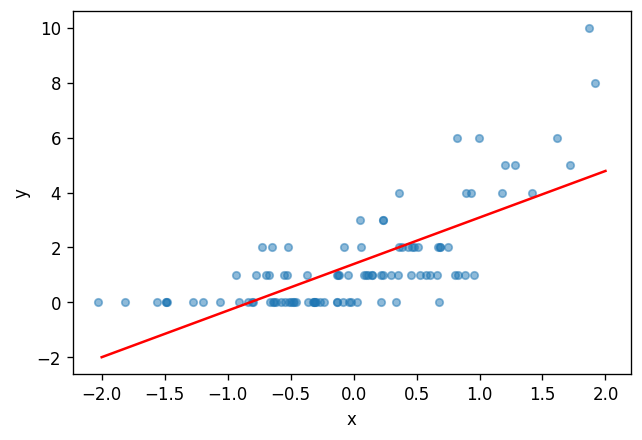

In [13]:

df = pd.read_csv('poisson_regression_data.csv')
# Get X data
x = df.x.values 
# Add intercept to make design matrix
X = np.c_[np.ones(x.size), x]
# Get y data
y= df.y.values

fig, ax = plt.subplots(dpi = 120)
# Scatter the data.  Pretty standard
df.plot.scatter('x','y', ax = ax, alpha = 0.5)

# Construct the linear model
ols_fit = linear_model.LinearRegression().fit(X, y)

# We need to predict on data from -2 to 2.
# We need to first create an array of linearly spaced points between -2 and 2
# Then, we need to turn that into a design matrix
newx = np.linspace(-2,2,1001)
# Add intercept
newX = np.c_[np.ones(newx.size), newx]

# predict on the new data
y_predicted_ols = ols_fit.predict(newX)
ax.plot(newx,y_predicted_ols,color = 'red')

The major problems with the predictions from linear regression is that the model predicts negative counts which is impossible as this model is intended to model counts.

